In [ ]:
# TODO 

# Multiclass SVM!!

# Try Random Forest and SVM (only) on combo of Gioia and Ken's features. (Try to add some of my own features.) 

# write-up

# FEATURES: start looking at the XML tree and play with this XML parsing? See sample text file
# EDA & VIZ: 
# - TP/FP rate for each class (ROC, Confusion matrix?). Visualization
# - visualizations? Take stuff from data science - ROC curve, confusion matrix? 


# LATER
# MODELS: Try neural network? 
# Tune model
# (See Osprey security stuff? NSecurity? OneNote)

# but i was thinking i am really only going tweak this model (if it performs decently), and MAYBE 
# combine it with your stuff.  Or maybe we should consider “Stacking” whatever that is.  I keep hearing that works well.
# But I’m thinking other than maybe Amy’s SVM, my sequence stuff, and maybe stacking 1/2 of those with G’s stuff, 
# I doubt were going to have time to do any more modeling.  So maybe we should start cleaning up the report and just 
# leave blanks for that stuff.

# Majority Classifier: All None. input into report and write up - see Data Science for words on this

In [2]:
# DONE 
# do random train-test split
# try out the same process of creating predictions with the features given 
# Majority Classifier: create baseline for all None's and validate
# Try running on VM

In [4]:
original_sys_path = list(sys.path)

In [5]:
cwd = os.getcwd()
project_root = cwd[:cwd.index('/CS181_practicals')] + '/CS181_practicals'
print project_root
sys.path.append(project_root)
sys.path # print sys.path

/home/amlsf/CS181_practicals


['',
 '/home/anaconda2/anaconda2/lib/python27.zip',
 '/home/anaconda2/anaconda2/lib/python2.7',
 '/home/anaconda2/anaconda2/lib/python2.7/plat-linux2',
 '/home/anaconda2/anaconda2/lib/python2.7/lib-tk',
 '/home/anaconda2/anaconda2/lib/python2.7/lib-old',
 '/home/anaconda2/anaconda2/lib/python2.7/lib-dynload',
 '/home/anaconda2/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/home/anaconda2/anaconda2/lib/python2.7/site-packages/setuptools-19.6.2-py2.7.egg',
 '/home/anaconda2/anaconda2/lib/python2.7/site-packages',
 '/home/anaconda2/anaconda2/lib/python2.7/site-packages/cryptography-1.0.2-py2.7-linux-x86_64.egg',
 '/home/anaconda2/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/amlsf/.ipython',
 '/home/amlsf/CS181_practicals']

In [6]:
import os
import sys
import time
import numpy as np
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.grid_search import GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

from gakutility import practical2_amy as p2

In [89]:
import pickle
from sklearn.externals import joblib

In [7]:
reload(p2)

<module 'gakutility.practical2_amy' from '/home/amlsf/CS181_practicals/gakutility/practical2_amy.pyc'>

In [8]:
p2.MALWARE_CLASSES

['Agent',
 'AutoRun',
 'FraudLoad',
 'FraudPack',
 'Hupigon',
 'Krap',
 'Lipler',
 'Magania',
 'None',
 'Poison',
 'Swizzor',
 'Tdss',
 'VB',
 'Virut',
 'Zbot']

In [9]:
len(p2.MALWARE_CLASSES)

15

In [10]:
# record performance of different models
tracker = {}

# Exploratory Data Analysis

In [11]:
plt.hist(Y_train_all, normed=True, bins=15)
plt.title("Classification Distribution in Training Data")
plt.plot()

NameError: name 'Y_train_all' is not defined

In [82]:
tree = ET.parse(os.path.join('/home/shared/practical2/data/train', '699ee544c70e89893dd700a2Dd156b303f8e99c6e.VB.xml'))

In [83]:
for item in tree.iter():
    print item.tag

processes
process
thread
all_section
load_image
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
load_dll
check_for_debugger
load_dll
get_system_directory
open_key
open_key
query_value
create_mutex
create_mutex
create_mutex
create_mutex
create_mutex
open_key
query_value
query_value
get_system_directory
open_key
query_value
create_mutex
set_windows_hook
set_windows_hook
create_window
load_dll
open_key
load_dll
open_key
query_value
load_dll
get_system_directory
load_dll
get_system_directory
load_dll
load_dll
get_system_directory
create_window
open_key
query_value
open_key
query_value
get_system_directory
load_dll
create_window
show_window
open_key
set_windows_hook
create_window
open_key
create_open_file
enum_window
create_window
create_window
find_window
enum_window
create_window
show_window
enum_window
show_window
get_system_directory
enum_window
open_key
open_key
read_value
open_key
open_key
read_value
get_fil

# Feature Engineering

### 0. Just two calls (From CS181 Course Staff)

##### Generate Features & Train-Test-Split

In [ ]:
# don't need train_ids_all
X_train_all, Y_train_all, train_ids_all = p2.create_data_matrix(p2.call_feats_given, direc='/home/shared/practical2/data/train')
#  start_index=0, end_index=5

# split out randomly into train_test_split 80-20
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_all, Y_train_all, train_size=0.7, random_state=1004)

# don't need the Y_test
X_test, Y_test, test_ids = p2.create_data_matrix(p2.call_feats_given, direc='/home/shared/practical2/data/test')

In [108]:
# # Provided by CS181 Course staff
# def call_feats_given(tree):
#     good_calls = ['sleep', 'dump_line']

#     call_counter = {}
#     for el in tree.iter():
#         call = el.tag
#         if call not in call_counter:
#             call_counter[call] = 0
#         else:
#             call_counter[call] += 1

#     call_feat_array = np.zeros(len(good_calls))
#     for i in range(len(good_calls)):
#         call = good_calls[i]
#         call_feat_array[i] = 0
#         if call in call_counter:
#             call_feat_array[i] = call_counter[call]

#     return call_feat_array

### 1. Count number and percentage of all calls

In [ ]:
# have to run p2.call_feats_given first to get this to populate
num_calls = len(p2.CALL_SET)
num_calls

In [17]:
def call_feats_all_count_perc(tree):
    '''
    Sample feature engineering function.
    Returns the number of system specific calls made by the programs.
    '''

    # keep track of calls
    call_counter = {}
    
    # loop through all calls/tags in the XML file
    for el in tree.iter():
        
        # extract the call/tag name
        call = el.tag
        
        # count the number of calls to each tag
        if call not in call_counter:
            call_counter[call] = 0
        else:
            call_counter[call] += 1
            
    # initialize the feature array (1 x 2D)        
    call_feat_array = np.zeros(2 * num_calls)
    
    # loop through the calls we are looking for
    for i, call in enumerate(p2.CALL_SET):
        
        # update counter with the number of times the call was seen
        if call in call_counter:
            call_feat_array[i] = call_counter[call]
        else:
            call_feat_array[i] = 0
            
    # add percentages
    call_feat_array[num_calls:] = (call_feat_array[:num_calls] / call_feat_array[:num_calls].sum()).copy()

    # return feature array (1 x D)
    return call_feat_array

In [18]:
cpcall_X_train_all, cpcall_Y_train_all, cpcall_train_ids_all = p2.create_data_matrix(call_feats_all_count_perc, 
                                                                                     direc='/home/shared/practical2/data/train')
cpcall_X_test, cpcall_Y_test, cpcall_test_ids = p2.create_data_matrix(call_feats_all_count_perc, 
                                                                      direc='/home/shared/practical2/data/test')

# split out randomly into train_test_split 80-20
cpcall_X_train, cpcall_X_valid, cpcall_Y_train, cpcall_Y_valid = train_test_split(cpcall_X_train_all, cpcall_Y_train_all, 
                                                                                  train_size=0.7, random_state=1004)

In [19]:
pd.DataFrame(cpcall_X_train_all).shape

(3086, 220)

In [20]:
# makes sense there would be 2 * 110 call feats
pd.DataFrame(cpcall_X_test).shape

(3724, 220)

### 2. N-grams of System Call Sequences

In [12]:
# load data from K-Lo

ngrams_X_train_all = pd.read_csv('/home/shared/practical2/data/features/bigtrain.csv').drop('Unnamed: 0', axis=1)
# turn into numpy matrix
ngrams_X_train_all = ngrams_X_train_all.as_matrix()

ngrams_X_test = pd.read_csv('/home/shared/practical2/data/features/bigtest.csv').drop('Unnamed: 0', axis=1)
# turn into numpy matrix
ngrams_X_test = ngrams_X_test.as_matrix()

In [13]:
ngrams_Y_train_all = pd.read_csv('/home/shared/practical2/data/features/train_yvals.csv').drop('Unnamed: 0', axis=1)
# turn Y_train into array
ngrams_Y_train_all = np.array(ngrams_Y_train_all['0'])

In [14]:
len(ngrams_Y_train_all)

3086

In [15]:
pd.DataFrame(ngrams_X_train_all).shape

(3086, 191855)

In [16]:
pd.DataFrame(ngrams_X_test).shape

(3724, 191855)

In [17]:
pd.DataFrame(ngrams_X_train_all).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,191755,191756,191757,191758,191759,191760,191761,191762,191763,191764,191765,191766,191767,191768,191769,191770,191771,191772,191773,191774,191775,191776,191777,191778,191779,191780,191781,191782,191783,191784,191785,191786,191787,191788,191789,191790,191791,191792,191793,191794,191795,191796,191797,191798,191799,191800,191801,191802,191803,191804,191805,191806,191807,191808,191809,191810,191811,191812,191813,191814,191815,191816,191817,191818,191819,191820,191821,191822,191823,191824,191825,191826,191827,191828,191829,191830,191831,191832,191833,191834,191835,191836,191837,191838,191839,191840,191841,191842,191843,191844,191845,191846,191847,191848,191849,191850,191851,191852,191853,191854
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,6,0,8,7,0,0,0,2,4,1,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,2,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.DataFrame(ngrams_X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,191755,191756,191757,191758,191759,191760,191761,191762,191763,191764,191765,191766,191767,191768,191769,191770,191771,191772,191773,191774,191775,191776,191777,191778,191779,191780,191781,191782,191783,191784,191785,191786,191787,191788,191789,191790,191791,191792,191793,191794,191795,191796,191797,191798,191799,191800,191801,191802,191803,191804,191805,191806,191807,191808,191809,191810,191811,191812,191813,191814,191815,191816,191817,191818,191819,191820,191821,191822,191823,191824,191825,191826,191827,191828,191829,191830,191831,191832,191833,191834,191835,191836,191837,191838,191839,191840,191841,191842,191843,191844,191845,191846,191847,191848,191849,191850,191851,191852,191853,191854
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
len(ngrams_X_train_all[0])

191855

In [20]:
# break out into train_test_split
# ngrams_Y_train already in numpy array form
ngrams_X_train, ngrams_X_valid, ngrams_Y_train, ngrams_Y_valid = train_test_split(
    ngrams_X_train_all, ngrams_Y_train_all, train_size=0.7, random_state=1004)

In [21]:
1+1

2

### 3. Combine N-grams with counts and percentages

In [33]:
ngcp_X_train_all = pd.concat((pd.DataFrame(cpcall_X_train_all), pd.DataFrame(ngrams_X_train_all)), axis=0)    
ngcp_X_test = pd.concat((pd.DataFrame(cpcall_X_test), pd.DataFrame(ngrams_X_test)), axis=0)

MemoryError: 

In [ ]:
print ngcp_X_train_all.shape
print ngcp_X_test.shape

In [ ]:
ngcp_X_train_all.head()

In [ ]:
ngcp_X_test.head()

In [ ]:
# turn  back into matrix
ngcp_X_train_all = ngcp_X_train_all.as_matrix()
ngcp_X_test = ngcp_X_test.as_matrix()

In [43]:
ngrams_Y_train_all

array([ 8,  6, 12, ...,  8,  8,  3])

In [44]:
cpcall_Y_train_all

array([10,  8,  8, ...,  8,  8,  3])

In [49]:
# Check that these are the same
np.array_equal(Y_train_all, ngrams_Y_train_all)

False

In [50]:
np.array_equal(Y_train_all, cpcall_Y_train_all)

True

In [ ]:
# TODO WARNING Y_train_all may not be the same
ngcp_X_train, ngcp_X_valid, ngcp_Y_train, ngcp_Y_valid = train_test_split(
    ngcp_X_train_all, Y_train_all, train_size=0.7, random_state=1004)

### 4. DLL Library Files

### 5. Count of Successful and Failed DLL Load System Calls

# Data Scaling / Normalization

# Resampling / Rebalancing

In [ ]:
# TODO

# Modeling

### 0. Baseline Model - All Not Malware

In [ ]:
p2.MALWARE_CLASSES.index('None')

In [ ]:
baseline_train_pred = np.ones([len(X_train)])*8
baseline_valid_pred = np.ones([len(X_valid)])*8
baseline_test_pred = np.ones([len(X_test)])*8

In [ ]:
print len(baseline_train_pred)
print len(baseline_valid_pred)
print len(baseline_test_pred)

In [26]:
# training set
accuracy_score(Y_train, baseline_train_pred)

0.52222222222222225

In [27]:
# validation set
accuracy_score(Y_valid, baseline_valid_pred)

0.51943844492440605

In [30]:
p2.write_predictions(baseline_test_pred, test_ids, 'predictions/baseline_allNone.csv')

### 1. Logistic Regression

#### 2 Features Provided

In [34]:
start = time.time()

model = LogisticRegression()

# parameters
penalties = ['l1', 'l2']
cs = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0] # default = 1.0

# cross-validation
model = p2.cv_optimize(model, {'penalty': penalties, 'C': cs}, X_train, Y_train)

# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, X_train, Y_train, test_x=X_valid, test_y=Y_valid, title='LR Features provided',
                     tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, X_train_all, Y_train_all)
# Y_test_pred = model.predict(X_test)
# p2.write_predictions(Y_test_pred, test_ids, 'predictions/baseline_logistic.csv')

print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

BEST {'penalty': 'l2', 'C': 1e-05} 0.653703703704 [mean: 0.03657, std: 0.00077, params: {'penalty': 'l1', 'C': 1e-06}, mean: 0.59120, std: 0.13042, params: {'penalty': 'l2', 'C': 1e-06}, mean: 0.19537, std: 0.00477, params: {'penalty': 'l1', 'C': 1e-05}, mean: 0.65370, std: 0.01983, params: {'penalty': 'l2', 'C': 1e-05}, mean: 0.45648, std: 0.15508, params: {'penalty': 'l1', 'C': 0.0001}, mean: 0.61435, std: 0.01474, params: {'penalty': 'l2', 'C': 0.0001}, mean: 0.46528, std: 0.15409, params: {'penalty': 'l1', 'C': 0.001}, mean: 0.59398, std: 0.01052, params: {'penalty': 'l2', 'C': 0.001}, mean: 0.55741, std: 0.01041, params: {'penalty': 'l1', 'C': 0.01}, mean: 0.55926, std: 0.01016, params: {'penalty': 'l2', 'C': 0.01}, mean: 0.54583, std: 0.01236, params: {'penalty': 'l1', 'C': 0.1}, mean: 0.54630, std: 0.01205, params: {'penalty': 'l2', 'C': 0.1}, mean: 0.54398, std: 0.01350, params: {'penalty': 'l1', 'C': 1.0}, mean: 0.54398, std: 0.01350, params: {'penalty': 'l2', 'C': 1.0}, mean:

In [35]:
tracker

{'LR Features provided': [LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.65833333333333333,
  0.66090712742980562]}

In [ ]:
Y_test_pred = model.predict(X_test)
p2.write_predictions(Y_test_pred, test_ids, 'predictions/baseline_logistic.csv')

### 2. Random Forest

#### 2 Features Provided

In [36]:
start = time.time()

# update model class and/or parameters to search over here
model = RandomForestClassifier()
estimators = [10, 50, 100, 150, 200, 250] # default = 10
features = [0.1, 0.25, 0.5, 0.75, 1.0, 'sqrt', 'log2'] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [1, 5, 10, 25, 50, 100] # default = 1

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'n_estimators': estimators, 'max_features': features,
                            'max_depth': depths, 'min_samples_leaf': samples}, X_train, Y_train)

# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, X_train, Y_train, test_x=X_valid, test_y=Y_valid, title='Random Forest Features provided',
                     tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, X_train_all, Y_train_all)
# Y_test_pred = model.predict(X_test)
# p2.write_predictions(Y_test_pred, test_ids, 'predictions/f02_random_forest.csv')

print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/f02_random_forest.pkl');

BEST {'max_features': 1.0, 'n_estimators': 200, 'max_depth': None, 'min_samples_leaf': 1} 0.741203703704 [mean: 0.73981, std: 0.01306, params: {'max_features': 0.1, 'n_estimators': 10, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.74028, std: 0.01221, params: {'max_features': 0.1, 'n_estimators': 50, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.74028, std: 0.01445, params: {'max_features': 0.1, 'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.74074, std: 0.01360, params: {'max_features': 0.1, 'n_estimators': 150, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.74028, std: 0.01222, params: {'max_features': 0.1, 'n_estimators': 200, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.73935, std: 0.01288, params: {'max_features': 0.1, 'n_estimators': 250, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.72593, std: 0.01524, params: {'max_features': 0.1, 'n_estimators': 10, 'max_depth': None, 'min_samples_leaf': 5}, mean: 0.72407, std: 0.01281, params:

In [36]:
tracker

{'LR Features provided': [LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.65833333333333333,
  0.66090712742980562],
 'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.7949074074074074, 0.74838012958963285]}

In [ ]:
Y_test_pred = model.predict(X_test)
p2.write_predictions(Y_test_pred, test_ids, 'predictions/f02_random_forest.csv')

#### Call Counts & Percentages

In [58]:
start = time.time()

# update model class and/or parameters to search over here
model = RandomForestClassifier()
estimators = [10, 50, 100, 150, 200, 250] # default = 10
features = [0.1, 0.25, 0.5, 0.75, 1.0, 'sqrt', 'log2'] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [1, 5, 10, 25, 50, 100] # default = 1

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'n_estimators': estimators, 'max_features': features,
                            'max_depth': depths, 'min_samples_leaf': samples}, cpcall_X_train, cpcall_Y_train)

# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, cpcall_X_train, cpcall_Y_train, test_x=cpcall_X_valid, test_y=cpcall_Y_valid, 
                     title='Random Forest Features provided', tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, cpcall_X_train_all, cpcall_Y_train_all)
Y_test_pred = model.predict(X_test)
p2.write_predictions(Y_test_pred, test_ids, 'predictions/random_forest_callcountperc.csv')

print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/f02_random_forest.pkl');

BEST {'max_features': 0.5, 'n_estimators': 150, 'max_depth': None, 'min_samples_leaf': 1} 0.889814814815 [mean: 0.87269, std: 0.01161, params: {'max_features': 0.1, 'n_estimators': 10, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.88241, std: 0.00742, params: {'max_features': 0.1, 'n_estimators': 50, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.88611, std: 0.01427, params: {'max_features': 0.1, 'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.88657, std: 0.00986, params: {'max_features': 0.1, 'n_estimators': 150, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.88704, std: 0.01027, params: {'max_features': 0.1, 'n_estimators': 200, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.88657, std: 0.01291, params: {'max_features': 0.1, 'n_estimators': 250, 'max_depth': None, 'min_samples_leaf': 1}, mean: 0.86759, std: 0.01081, params: {'max_features': 0.1, 'n_estimators': 10, 'max_depth': None, 'min_samples_leaf': 5}, mean: 0.87315, std: 0.01185, params:

ValueError: Number of features of the model must  match the input. Model n_features is 220 and  input n_features is 2 

In [ ]:
tracker

### Ngrams Only

In [62]:
start = time.time()

t = 250
f = 0.5
s = 1

model = RandomForestClassifier(n_estimators=t, max_features=f, min_samples_leaf=s)

# cross-validation on training set to identify optimal parameters
# model = p2.cv_optimize(model, {'n_estimators': estimators, 'max_features': features,
#                                 'min_samples_leaf': samples}, ngrams_X_train_all, ngrams_Y_train_all)



# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, ngrams_X_train, ngrams_Y_train, test_x=ngrams_X_valid, test_y=ngrams_Y_valid, 
                     title='Random Forest ngram %r trees, %r features, %r samples' % (t, f, s), tracker=tracker)

print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/f02_random_forest.pkl');

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.9006
----------
############
5803.4 seconds runtime


In [64]:
# fit model on entire training set with optimal parameters and make predictions
# pick best model from tracker
model = p2.fit_model(model, ngrams_X_train_all, ngrams_Y_train_all)
Y_test_pred = model.predict(ngrams_X_test)
# change to 250 filename
p2.write_predictions(Y_test_pred, ngram_X_test_ids, 'predictions/randomforest_ngram_250_point5features.csv')

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9922
----------
############


In [91]:
estimators = [300] # try 500
features = [0.5, 0.4] # try 0.5, 0.4
samples = [1]

for t in estimators: 
    for f in features: 
        for s in samples: 
            start = time.time()
            
            model = RandomForestClassifier(n_estimators=t, max_features=f, min_samples_leaf=s)

            # cross-validation on training set to identify optimal parameters
            # model = p2.cv_optimize(model, {'n_estimators': estimators, 'max_features': features,
            #                                 'min_samples_leaf': samples}, ngrams_X_train_all, ngrams_Y_train_all)

            # fit model on training set with optimal parameters
            # check out-of-sample performance using validation set
            model = p2.fit_model(model, ngrams_X_train, ngrams_Y_train, test_x=ngrams_X_valid, test_y=ngrams_Y_valid, 
                                 title='Random Forest ngram %r trees, %r features, %r samples' % (t, f, s), tracker=tracker)

            print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/f02_random_forest.pkl');

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8952
----------
############
6540.7 seconds runtime
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8963
----------
############
5658.4 seconds runtime


In [95]:
tracker

{'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89416846652267823],
 'Random Forest ngram 150 trees': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89308855291576672],
 'Random Forest ngram 200 trees, 0.5 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weigh

In [99]:
for model, items in tracker.iteritems():
    print model
    print items[0]
    print 'models/%s.pkl' % model
    joblib.dump(model, 'models/%s.pkl' % model)

Random Forest ngram 250 trees, 0.4 features, 1 samples
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
models/Random Forest ngram 250 trees, 0.4 features, 1 samples.pkl
Random Forest ngram 250 trees, 0.4 features, 10 samples
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.4, max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
models/Random Forest ngram 250 trees, 0.4 features, 10 samples.pkl
Random Forest ngram 250 trees, 0.8 features, 

In [ ]:
{'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89416846652267823],
 'Random Forest ngram 150 trees': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89308855291576672],
 'Random Forest ngram 200 trees, 0.5 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.4, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89308855291576672],
 'Random Forest ngram 250 trees, 0.4 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.4, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89632829373650103],
 'Random Forest ngram 250 trees, 0.4 features, 10 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.4, max_leaf_nodes=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.91388888888888886, 0.87365010799136067],
 'Random Forest ngram 250 trees, 0.5 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.5, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.90064794816414684],
 'Random Forest ngram 250 trees, 0.6 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89740820734341253],
 'Random Forest ngram 250 trees, 0.8 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89848812095032393],
 'Random Forest ngram 300 trees, 0.6 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89632829373650103],
 'Random Forest ngram 300 trees, 0.8 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89740820734341253]}

In [97]:
model = tracker['Random Forest ngram 300 trees, 0.8 features, 1 samples'][0]
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
# TODO HERE NOW
# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, ngrams_X_train_all, ngrams_Y_train_all)
Y_test_pred = model.predict(ngrams_X_test)
p2.write_predictions(Y_test_pred, ngram_X_test_ids, 'predictions/randomforest_ngram_300_point8.csv')

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9922
----------
############


In [33]:
#  Kaggle 0.82947 
{'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89416846652267823]}

2

In [ ]:
{'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89416846652267823],
 'Random Forest ngram 150 trees': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89632829373650103]}

In [ ]:
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8931
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9922
----------
############
8310.6 seconds runtime

In [ ]:
# Kaggle 0.83737 - #1 team
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8996
----------
############
4535.7 seconds runtime


############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9922
----------
############

In [ ]:
# Kaggle 0.83579

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.9006
----------
############
5803.4 seconds runtime

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9922
----------
############

In [ ]:
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8963
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.4, max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9139
Validation set accuracy = 0.8737
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8974
----------
############

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8974
----------
############
9664.1 seconds runtime
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8974
----------
############
6422.0 seconds runtime
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set accuracy = 0.9931
Validation set accuracy = 0.8985
----------
############
7882.2 seconds runtime

In [36]:
ngram_X_test_ids = pd.read_csv('/home/shared/practical2/data/features/ngram_X_testids.csv')

In [37]:
ngram_X_test_ids

,Unnamed: 0,0
0,0,0015c8c9ff02fea9d0f45692b9eebfb4abff4e42f
1,1,001f298a534ae4b0db7f2707169250aa215c3b5f2
2,2,001f5fdaaa8bbe20303527198d09a30bb7ca3eb50
3,3,002ca2c41b649f85c05ae30013436781a932fecc6
4,4,003e109543b4ea22d2bcc1ec309bf2fd34e9a1a1d
5,5,004070b468d6bb29848c76cfCd5887849c7bb648d
6,6,00461dd05c981edde167a5947c365472141e04bb1
7,7,005b95d2520C8621171566f5803437b0c443778e1
8,8,0071a3b818ed06d3865a24fdb31d4147c67fabfc5
9,9,007436715ec13cedd38344772a2144a3d79f3ea68


In [38]:
ngram_X_test_ids = ngram_X_test_ids.drop('Unnamed: 0', axis=1)['0']

# turn into numpy matrix
ngram_X_test_ids = ngram_X_test_ids.as_matrix()

In [39]:
ngram_X_test_ids

array(['0015c8c9ff02fea9d0f45692b9eebfb4abff4e42f',
       '001f298a534ae4b0db7f2707169250aa215c3b5f2',
       '001f5fdaaa8bbe20303527198d09a30bb7ca3eb50', ...,
       'ff85866b215233b2fecdca2c2b8fda54ad24c86fd',
       'ff884224571e0476990574df5da76e0991db583af',
       'ffc47163a530c51ef2e6572d786aefbaed99890f2'], dtype=object)

In [26]:
len(ngram_X_test_ids)

3724

In [27]:
len(ngrams_X_test)

3724

#### TODO Ngrams & Call Counts & Percentages

In [ ]:
start = time.time()

# update model class and/or parameters to search over here
model = RandomForestClassifier()
estimators = [10, 50, 100, 150, 200, 250] # default = 10
features = [0.1, 0.25, 0.5, 0.75, 1.0, 'sqrt', 'log2'] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [1, 5, 10, 25, 50, 100] # default = 1

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'n_estimators': estimators, 'max_features': features,
                            'max_depth': depths, 'min_samples_leaf': samples}, ngcp_X_train, ngcp_Y_train)

# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, ngcp_X_train, ngcp_Y_train, test_x=ngcp_X_valid, test_y=ngcp_X_train, ngcp_X_valid, 
                     ngcp_Y_train, ngcp_Y_valid, title='Random Forest Features provided',
                     tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, ngcp_X_train_all, ngcp_Y_train_all)
Y_test_pred = model.predict(ngcp_X_test)
p2.write_predictions(Y_test_pred, test_ids, 'predictions/combo_countcalls_ngrams_random_forest.csv')

print '%0.1f seconds runtime' % (time.time() - start)

# option to save fitted model
# joblib.dump(model, 'models/f02_random_forest.pkl');

### 3. Multi-class SVM

#### 2 Features Provided

In [ ]:
start = time.time()

# model = OneVsRestClassifier(LinearSVC(random_state=0))
model = LinearSVC(random_state=0)

Cs=[0.01, 0.1, 1.0, 10.0, 100.0] # default = 1
# Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # default = 1
# Cs=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
loss = ['squared_hinge', 'hinge'] # default=’squared_hinge’; 'hinge' is another option but cannot be combined with l1 penalty
penalty = ['l1', 'l2'] # default=’l2’
"""
multi_class (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest 
classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer 
is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely 
leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty 
and dual will be ignored.
"""

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'C': Cs, 'loss': loss}, X_train, Y_train)
# 'penalty': penalty, 'loss': loss


# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, X_train, Y_train, test_x=X_valid, test_y=Y_valid, title='LinearSVC Features provided',
                     tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
# model = p2.fit_model(model, X_train_all, Y_train_all)
# Y_test_pred = model.predict(X_test)
# p2.write_predictions(Y_test_pred, test_ids, 'predictions/svc_2_feat only.csv')

print '%0.1f seconds runtime' % (time.time() - start)

In [ ]:
tracker

#### Call Counts & Percentages

In [54]:
start = time.time()

# model = OneVsRestClassifier(LinearSVC(random_state=0))
model = LinearSVC(random_state=0)

# TODO try smaller? 0.001
Cs=[0.01, 0.1, 1.0, 10.0, 100.0] # default = 1
# Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # default = 1
# Cs=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
loss = ['squared_hinge', 'hinge'] # default=’squared_hinge’; 'hinge' is another option but cannot be combined with l1 penalty
penalty = ['l1', 'l2'] # default=’l2’
"""
multi_class (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest 
classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer 
is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely 
leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty 
and dual will be ignored.
"""

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'C': Cs, 'loss': loss}, cpcall_X_train, cpcall_Y_train)
# 'penalty': penalty, 'loss': loss


# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, cpcall_X_train, cpcall_Y_train, test_x=cpcall_X_valid, test_y=cpcall_Y_valid, 
                     title='LinearSVC count calls', tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, cpcall_X_train_all, cpcall_Y_train_all)
Y_test_pred = model.predict(cpcall_X_test)
# Kaggle 0.74211
p2.write_predictions(Y_test_pred, test_ids, 'predictions/svm_count_call_perc.csv')

print '%0.1f seconds runtime' % (time.time() - start)

BEST {'loss': 'squared_hinge', 'C': 0.01} 0.815740740741 [mean: 0.81574, std: 0.02896, params: {'loss': 'squared_hinge', 'C': 0.01}, mean: 0.80139, std: 0.04905, params: {'loss': 'hinge', 'C': 0.01}, mean: 0.78519, std: 0.03555, params: {'loss': 'squared_hinge', 'C': 0.1}, mean: 0.77130, std: 0.02303, params: {'loss': 'hinge', 'C': 0.1}, mean: 0.57083, std: 0.17874, params: {'loss': 'squared_hinge', 'C': 1.0}, mean: 0.73935, std: 0.04636, params: {'loss': 'hinge', 'C': 1.0}, mean: 0.61481, std: 0.07967, params: {'loss': 'squared_hinge', 'C': 10.0}, mean: 0.63935, std: 0.12817, params: {'loss': 'hinge', 'C': 10.0}, mean: 0.68889, std: 0.03149, params: {'loss': 'squared_hinge', 'C': 100.0}, mean: 0.63889, std: 0.08277, params: {'loss': 'hinge', 'C': 100.0}]
############
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
--------

In [52]:
tracker

{'LR Features provided': [LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.65833333333333333,
  0.66090712742980562],
 'LinearSVC count calls': [LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
       verbose=0), 0.85833333333333328, 0.83261339092872566],
 'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=1.0, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
              oob_score=False, random_state=None, verb

#### Ngrams

In [55]:
start = time.time()

# model = OneVsRestClassifier(LinearSVC(random_state=0))
model = LinearSVC(random_state=0)

Cs=[0.01, 0.1, 1.0, 10.0, 100.0] # default = 1
# Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # default = 1
# Cs=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
loss = ['squared_hinge', 'hinge'] # default=’squared_hinge’; 'hinge' is another option but cannot be combined with l1 penalty
# penalty = ['l1', 'l2'] # default=’l2’
"""
multi_class (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest 
classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer 
is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely 
leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty 
and dual will be ignored.
"""
# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'C': Cs, 'loss': loss}, ngrams_X_train, ngrams_Y_train)
# 'penalty': penalty, 'loss': loss


# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, ngrams_X_train, ngrams_Y_train, test_x=ngrams_X_valid, test_y=ngrams_Y_valid, 
                     title='LinearSVC ngrams', tracker=tracker)

# # fit model on entire training set with optimal parameters and make predictions
# model = p2.fit_model(model, ngrams_X_train_all, ngrams_Y_train_all)
# Y_test_pred = model.predict(ngrams_X_test)
# p2.write_predictions(Y_test_pred, test_ids, 'predictions/svc_ngram.csv')

print '%0.1f seconds runtime' % (time.time() - start)

BEST {'loss': 'squared_hinge', 'C': 0.01} 0.865277777778 [mean: 0.86528, std: 0.00516, params: {'loss': 'squared_hinge', 'C': 0.01}, mean: 0.85463, std: 0.00766, params: {'loss': 'hinge', 'C': 0.01}, mean: 0.85509, std: 0.00911, params: {'loss': 'squared_hinge', 'C': 0.1}, mean: 0.85926, std: 0.00990, params: {'loss': 'hinge', 'C': 0.1}, mean: 0.82222, std: 0.01868, params: {'loss': 'squared_hinge', 'C': 1.0}, mean: 0.83519, std: 0.02089, params: {'loss': 'hinge', 'C': 1.0}, mean: 0.79028, std: 0.04912, params: {'loss': 'squared_hinge', 'C': 10.0}, mean: 0.75741, std: 0.08724, params: {'loss': 'hinge', 'C': 10.0}, mean: 0.77731, std: 0.02119, params: {'loss': 'squared_hinge', 'C': 100.0}, mean: 0.75741, std: 0.08724, params: {'loss': 'hinge', 'C': 100.0}]
############
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
--------

In [ ]:
1+1

In [56]:
tracker

{'LR Features provided': [LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.65833333333333333,
  0.66090712742980562],
 'LinearSVC count calls': [LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
       verbose=0), 0.85833333333333328, 0.83261339092872566],
 'LinearSVC ngrams': [LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
       verbose=0), 0.95416666666666672, 0.87257019438444927],
 'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, cl

In [57]:
# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, ngrams_X_train_all, ngrams_Y_train_all)

Y_test_pred = model.predict(ngrams_X_test)

p2.write_predictions(Y_test_pred, test_ids, 'predictions/svc_ngram.csv')

############
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
----------
Training set accuracy = 0.9601
----------
############


In [85]:
test_ids

['2701ec71e466d1f6bc966d516aa9b574c0773a361',
 'e9729c0163329b25671504a250e1b8ba8adc38b0e',
 'faC49e5c95cfeb1a440d1288e7e80db44106ebf7c',
 'a9b307db4e8a41c47104598d5d632fEacfb3134bf',
 'bfd2c650d81dd2bb598c193b6df68cbb30894b2c7',
 '28b7c7b16f89904b2526478a1b18a20a460b74Ef7',
 '46ca20796c31ac9e2a5536017a9001e02df1862e4',
 '976cc4f14f8ac5f70d7691f598b23bed644389f55',
 'ddf1c44dea023c3ef508a1f41745c3d4c2168fa10',
 'e7a3f89cfcdf6acd83fedb1405fb033512446e71f',
 'edab9f95a8de180756fc09ea3f6ae11239090dc8d',
 '8f497c3c551a4d872ea1cb2fdfb88a0477a6a0a75',
 'e284dd21461b5ec9a522824cd2eef2746ca4ed417',
 '8362796ad8025931e8f8fe719f9bce146be5ab1c6',
 '940f095dfd342c92c6de8090E77ac36ff3a1db24b',
 '9f1d4dc1fbf1d5df23e576187b76055eec74aC0fb',
 '95d763d2733ef7a210984b910f9a9c10eb0e9e039',
 '8f89ad48f361dcd397579b6245b27a8066ed36c21',
 'a7c2caa70bc0c4faf6479E4b95c4aea22b8178b09',
 '813c692aa297bec2e7a7f3ab1932d912480866a50',
 'f6d1c6b0393a8c90e42f17b7487da28ffa8a781fa',
 '7ed4f3d14df655b55e6354fd6028fd78

#### TODO Ngrams & Call Counts/Percentages

In [ ]:
start = time.time()

# model = OneVsRestClassifier(LinearSVC(random_state=0))
model = LinearSVC(random_state=0)

Cs=[0.01, 0.1, 1.0, 10.0, 100.0] # default = 1
# Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # default = 1
# Cs=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
loss = ['squared_hinge', 'hinge'] # default=’squared_hinge’; 'hinge' is another option but cannot be combined with l1 penalty
# penalty = ['l1', 'l2'] # default=’l2’
"""
multi_class (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest 
classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer 
is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely 
leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty 
and dual will be ignored.
"""
# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'C': Cs, 'loss': loss}, ngcp_X_train, ngcp_Y_train)
# 'penalty': penalty, 'loss': loss


# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, ngcp_X_train, ngcp_Y_train, test_x=ngcp_X_valid, test_y=ngcp_Y_valid, 
                     title='LinearSVC ngrams and call counts/percentages', tracker=tracker)

print '%0.1f seconds runtime' % (time.time() - start)

In [ ]:
# fit model on entire training set with optimal parameters and make predictions
model = p2.fit_model(model, ngcp_X_train_all, Y_train_all)

Y_test_pred = model.predict(ngcp_X_test)

p2.write_predictions(Y_test_pred, test_ids, 'predictions/svc_callcountpercentage_ngram.csv')

In [67]:
tracker

{'Random Forest Features provided': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89416846652267823],
 'Random Forest ngram 150 trees': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features=0.8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False), 0.99305555555555558, 0.89308855291576672],
 'Random Forest ngram 200 trees, 0.5 features, 1 samples': [RandomForestClassifier(bootstrap=True, class_weigh

# Visualizations

In [ ]:
# TODO try classification report, heatmap visualization of Confusion matrix
from sklearn.metrics import classification_report

In [ ]:
# http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
# https://en.wikipedia.org/wiki/Confusion_matrix

# Plot Confusion Matrix: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py

In [68]:
# try with linear svc ngrams
tracker['Random Forest ngram 250 trees, 0.5 features, 1 samples'][0]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
ngrams_Y_valid_predict = tracker['Random Forest ngram 250 trees, 0.5 features, 1 samples'][0].predict(ngrams_X_valid)

In [70]:
# confusion matrix 
svm_ngram_cm = confusion_matrix(ngrams_Y_valid, ngrams_Y_valid_predict)
list(svm_ngram_cm)

[array([29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0]),
 array([ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0]),
 array([  0,   0,   0,   0,   0,   0,   0,   0, 471,   0,   0,   1,   1,
          0,   0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,   0,   0,
          0,   0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0]),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 122,
          0,   0]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [72]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(p2.MALWARE_CLASSES))
    plt.xticks(tick_marks, p2.MALWARE_CLASSES, rotation=45)
    plt.yticks(tick_marks, p2.MALWARE_CLASSES)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

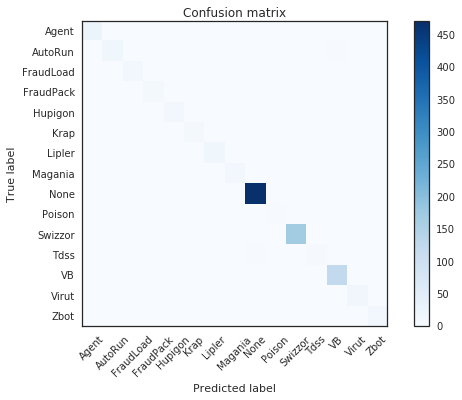

In [73]:
plot_confusion_matrix(svm_ngram_cm)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(ngrams_Y_valid, ngrams_Y_valid_predict, target_names=p2.MALWARE_CLASSES))

             precision    recall  f1-score   support

      Agent       1.00      1.00      1.00        29
    AutoRun       1.00      0.90      0.95        20
  FraudLoad       1.00      1.00      1.00        12
  FraudPack       1.00      1.00      1.00        10
    Hupigon       1.00      1.00      1.00        12
       Krap       1.00      1.00      1.00        10
     Lipler       1.00      1.00      1.00        17
    Magania       1.00      1.00      1.00        14
       None       0.99      1.00      0.99       473
     Poison       1.00      0.67      0.80         3
    Swizzor       1.00      1.00      1.00       168
       Tdss       0.83      0.71      0.77         7
         VB       0.98      1.00      0.99       122
      Virut       1.00      1.00      1.00        15
       Zbot       1.00      1.00      1.00        14

avg / total       0.99      0.99      0.99       926



In [ ]:
# TODO 
fpr, tpr, thresholds = roc_curve(X_valid, model.decision_function(X_valid))

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
# TODO 

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba: # for classifiers like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else: # for classifiers like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3,
                label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3,
                label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax